In [1]:
### General analysis package
import os
import time
import random
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import norm, pearsonr, spearmanr
from scipy.spatial import distance
### Drawing package
import matplotlib.pyplot as plt
from matplotlib import gridspec
import matplotlib.lines as mlines
from matplotlib.font_manager import FontProperties
#import seaborn as sns
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42 # Output editable PDF text
### else
#import cloudpickle as pickle
import warnings
warnings.filterwarnings("ignore") # Error alert
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #last_expr

In [2]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, roc_auc_score

In [3]:
X_train = pd.read_csv('20220610_Results/1. X_train.csv', index_col=0)
X_test = pd.read_csv('20220610_Results/1. X_test.csv', index_col=0)
y_train = pd.read_csv('20220610_Results/1. y_train.csv', index_col=0)
y_test = pd.read_csv('20220610_Results/1. y_test.csv', index_col=0)

In [4]:
def decomposition(data, y, method='PCA'):
    '''
    # data : data set with sample in index and item in columns
    # y : label of samples
    # method : decomposition methods (PCA, NMF, TSNE, LDA)
    # return : decomposed data, _, _
    '''
    from sklearn.decomposition import PCA, NMF
    from sklearn.manifold import TSNE
    from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
    pc1, pc2 = None, None
    if method=='PCA':
        methods = PCA(n_components=2)
        dec_data = methods.fit_transform(data)
        pc1, pc2 = methods.explained_variance_ratio_
    if method=='NMF':
        model = NMF(n_components=2, init='random', random_state=0)
        dec_data = model.fit_transform(data)
    if method=='TSNE':
        dec_data = TSNE(n_components=2).fit_transform(data)
    if method=='LDA':
        lda = LinearDiscriminantAnalysis()
        dec_data = lda.fit(data, y).transform(data)
    return dec_data, pc1, pc2

In [5]:
from sklearn.decomposition import PCA
clf = PCA(n_components=2)
pca_train = clf.fit_transform(X_train)
pca_test = clf.transform(X_test)
pc1, pc2 = clf.explained_variance_ratio_
pc1, pc2

(0.8451135293577775, 0.01926333423668179)

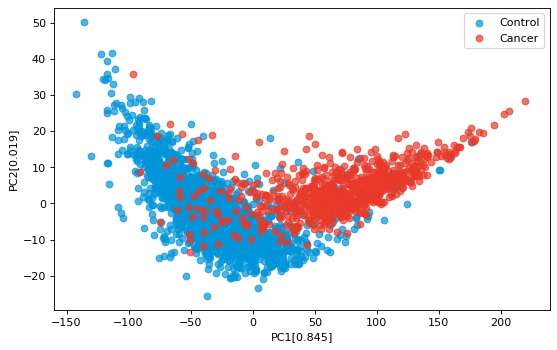

In [9]:
fig = plt.figure(figsize=(8, 5), dpi=80)
_ = plt.scatter(pca_train[y_train['Label']==0, 0], pca_train[y_train['Label']==0, 1], 
                c='#0095d9', label='Control', alpha=0.7)
_ = plt.scatter(pca_train[y_train['Label']==1, 0], pca_train[y_train['Label']==1, 1], 
                c='#e83929', label='Cancer', alpha=0.7)
_ = plt.xlabel('PC1[0.845]')
_ = plt.ylabel('PC2[0.019]')
_ = plt.legend()
fig.savefig('20220610_Results/2. PCA.pdf', dpi=300)